In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with WMF model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.wmf import WMF

## Datasets

In [3]:
## Uncomment corresponding directory.
DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = WMF

L2 = [10 ** p for p in range(1, 5)]
ALPHA = [10 ** p for p in range(0, 4)]
# L2 = [50, 100, 150, 200]
# ALPHA = [50, 100, 150]
T = [100, 200, 300]
MAX_ITER = 20
HYPERPARAMS = {'l2': L2, 'alpha': ALPHA, 'max_iterations': MAX_ITER, 't': T}
HYPERPARAMS

{'l2': [10, 100, 1000, 10000],
 'alpha': [1, 10, 100, 1000],
 'max_iterations': 20,
 't': [100, 200, 300]}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
# HYPERPARAMS['t'] = t
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model WMF with hyperparameters {'l2': 10, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.281
Average Recall@100 0.517
Average nDCG@100 0.322
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.339
Average Recall@100 0.571
Average nDCG@100 0.37
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.159
Average Recall@100 0.318
Average nDCG@100 0.184
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.001
Average Recall@100 0.012
Average nDCG@100 0.004
Training model WMF with hyperparameters {'l2': 10, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.362
Average Recall@100 0.615
Average nDCG@100 0.387
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.369
Average Recall@100 0.626
Average nDCG@100 0.397
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.285
Average Recall@100 0.512
Average nDCG@100 0.313
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.16
Average Recall@100 0.321
Average nDCG@100 0.185
Training model WMF with hyperparameters {'l2': 10, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.302
Average Recall@100 0.6
Average nDCG@100 0.326
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.305
Average Recall@100 0.602
Average nDCG@100 0.33
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.347
Average Recall@100 0.627
Average nDCG@100 0.375
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.2
Average Recall@100 0.407
Average nDCG@100 0.227
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.225
Average Recall@100 0.511
Average nDCG@100 0.247
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.218
Average Recall@100 0.511
Average nDCG@100 0.241
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.24
Average Recall@100 0.538
Average nDCG@100 0.261
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.23
Average Recall@100 0.479
Average nDCG@100 0.265
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.225
Average Recall@100 0.443
Average nDCG@100 0.27
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.34
Average Recall@100 0.572
Average nDCG@100 0.37
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.159
Average Recall@100 0.318
Average nDCG@100 0.184
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.103
Average Recall@100 0.101
Average nDCG@100 0.092
Training model WMF with hyperparameters {'l2': 10, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.332
Average Recall@100 0.578
Average nDCG@100 0.359
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.354
Average Recall@100 0.611
Average nDCG@100 0.382
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.285
Average Recall@100 0.513
Average nDCG@100 0.313
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.16
Average Recall@100 0.321
Average nDCG@100 0.185
Training model WMF with hyperparameters {'l2': 10, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.321
Average Recall@100 0.595
Average nDCG@100 0.342
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.321
Average Recall@100 0.601
Average nDCG@100 0.345
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.357
Average Recall@100 0.634
Average nDCG@100 0.385
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.201
Average Recall@100 0.408
Average nDCG@100 0.228
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.268
Average Recall@100 0.538
Average nDCG@100 0.287
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.268
Average Recall@100 0.545
Average nDCG@100 0.287
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.272
Average Recall@100 0.559
Average nDCG@100 0.295
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.231
Average Recall@100 0.48
Average nDCG@100 0.264
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.191
Average Recall@100 0.396
Average nDCG@100 0.234
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.341
Average Recall@100 0.572
Average nDCG@100 0.371
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.159
Average Recall@100 0.318
Average nDCG@100 0.184
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.151
Average Recall@100 0.161
Average nDCG@100 0.122
Training model WMF with hyperparameters {'l2': 10, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.302
Average Recall@100 0.537
Average nDCG@100 0.332
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.341
Average Recall@100 0.598
Average nDCG@100 0.37
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.285
Average Recall@100 0.513
Average nDCG@100 0.314
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.16
Average Recall@100 0.321
Average nDCG@100 0.185
Training model WMF with hyperparameters {'l2': 10, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.329
Average Recall@100 0.586
Average nDCG@100 0.35
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.329
Average Recall@100 0.591
Average nDCG@100 0.352
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.359
Average Recall@100 0.636
Average nDCG@100 0.388
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.201
Average Recall@100 0.408
Average nDCG@100 0.228
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.291
Average Recall@100 0.552
Average nDCG@100 0.312
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.292
Average Recall@100 0.558
Average nDCG@100 0.311
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.29
Average Recall@100 0.572
Average nDCG@100 0.312
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.232
Average Recall@100 0.48
Average nDCG@100 0.264



In [9]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.3970243194340286 achieved with {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 100}."

## Evaluate model with optimal hyperparams on test set

In [10]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)


CPU times: user 3min 52s, sys: 4min 53s, total: 8min 46s
Wall time: 33.6 s


In [11]:
%%time
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set



Evaluating with 10000 users
Average Recall@20 0.369
Average Recall@100 0.625
Average nDCG@100 0.395
CPU times: user 1min 35s, sys: 2.27 s, total: 1min 37s
Wall time: 50.6 s


## Plot amount of items from long tail recommended

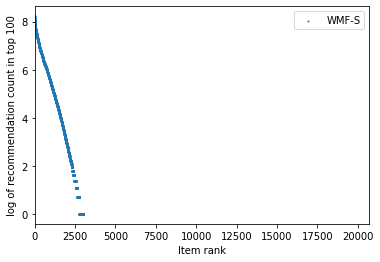

In [12]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["WMF-S"], k=100)